In [1]:
import os
import numpy as np
from h5 import HDFArchive
import json

x = 5, n_up: 8.455464295902285, n_down: 7.556046675015888, n_up - n_down: 0.22485440522159927
x = 5, n_up: 8.18160006373166, n_down: 7.821320488640991, n_up - n_down: 0.09006989377266716
x = 5, n_up: 8.106569933833132, n_down: 7.8941282522091845, n_up - n_down: 0.0531104204059869
x = 7, n_up: 8.631181458434021, n_down: 7.387491524336833, n_up - n_down: 0.31092248352429697
x = 7, n_up: 8.328463629706565, n_down: 7.676240995298742, n_up - n_down: 0.1630556586019558
x = 7, n_up: 8.167601729983922, n_down: 7.833834698342968, n_up - n_down: 0.08344175791023845
x = 10, n_up: 9.038404558945423, n_down: 6.993671415221271, n_up - n_down: 0.5111832859310381
x = 10, n_up: 8.509526269091435, n_down: 7.499067561880863, n_up - n_down: 0.25261467680264293
x = 10, n_up: 8.258821358013314, n_down: 7.743230714076719, n_up - n_down: 0.1288976609841488
x = 20, n_up: 10.373604715817576, n_down: 5.703652668482408, n_up - n_down: 1.167488011833792
x = 20, n_up: 9.28900366396106, n_down: 6.732500572082839, n_

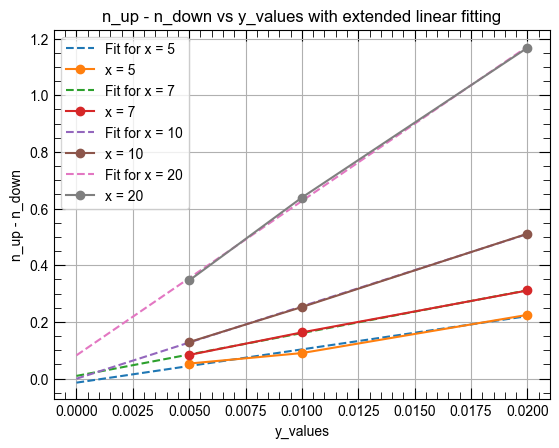

Fitting coefficients saved in 'fit_coefficients.json':
{'x = 5': {'slope': 11.739435010162602, 'intercept': -0.014281835318479173}, 'x = 7': {'slope': 15.111281819693932, 'intercept': 0.009508345449067842}, 'x = 10': {'slope': 25.538730127370748, 'intercept': -0.00038664358004877994}, 'x = 20': {'slope': 54.466482354632326, 'intercept': 0.08223401091166747}}


In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

# ループで使用する値のリスト
x_values = [5, 7, 10, 20]
y_values = [0.02, 0.01, 0.005]
z_values = [0.5]

# フィッティングの結果を保存するディクショナリ
fit_coeff_dict = {}

# プロットの設定
plt.figure()

# ループ処理
for x in x_values:
    y_list = []
    n_diff_list = []

    for z in z_values:
        for y in y_values:
            # ディレクトリ名の作成
            dir_name = f"b{x}-h{y}-U3.0-J{z}"

            # dft_filenameの作成
            dft_filename = f"{dir_name}/nsp"

            json_file_path = os.path.join(dir_name, "n_up_down.json")

            # JSONファイルの読み込み
            try:
                with open(json_file_path, "r") as json_file:
                    data = json.load(json_file)
                    n_up = data["n_up"]
                    n_down = data["n_down"]

                    # n_up - n_down の計算
                    n_diff = (n_up - n_down) / 4

                    # プロット用のリストに追加
                    y_list.append(y)
                    n_diff_list.append(n_diff)

                    print(
                        f"x = {x}, n_up: {n_up}, n_down: {n_down}, n_up - n_down: {n_diff}"
                    )

            except FileNotFoundError:
                print(f"File {json_file_path} not found.")
            except json.JSONDecodeError:
                print(f"Error decoding JSON from file {json_file_path}.")

    # 線形フィッティング
    if len(y_list) > 1:
        # numpyのpolyfitを使って1次のフィッティング
        coeff = np.polyfit(y_list, n_diff_list, 1)  # 傾きと切片を取得
        slope, intercept = coeff

        # ディクショナリにフィッティング結果を保存
        fit_coeff_dict[f"x = {x}"] = {"slope": slope, "intercept": intercept}

        # フィッティング線を広げてプロット（y=0をカバーする範囲）
        y_min = min(y_list)
        y_max = max(y_list)
        y_extend = np.linspace(0, y_max, 100)  # y=0 から y_values の最大値まで拡張

        fit_line = np.polyval(coeff, y_extend)

        # フィッティング結果を表示
        plt.plot(y_extend, fit_line, "--", label=f"Fit for x = {x}")

    # 各 x_values に対して元のデータをプロット
    plt.plot(y_list, n_diff_list, marker="o", label=f"x = {x}")

# フィッティング係数を保存するためにJSONファイルに書き込み
with open("fit_coefficients.json", "w") as outfile:
    json.dump(fit_coeff_dict, outfile, indent=4)

# プロットの詳細設定
plt.xlabel("y_values")
plt.ylabel("n_up - n_down")
plt.title("n_up - n_down vs y_values with extended linear fitting")
plt.grid(True)
plt.legend()  # 凡例を追加
plt.show()

# 保存したフィッティング係数を確認
print("Fitting coefficients saved in 'fit_coefficients.json':")
print(fit_coeff_dict)

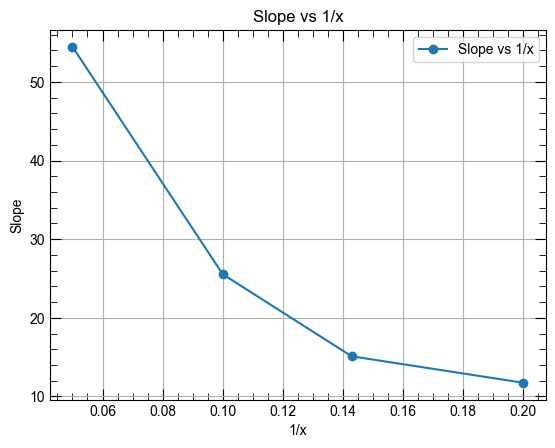

In [3]:
# プロット用のリストを作成
x_inv_list = []
slope_list = []

# 保存したフィッティング係数から slope を抽出
for x in x_values:
    x_inv_list.append(1 / x)  # 1/x の計算
    slope_list.append(fit_coeff_dict[f"x = {x}"]["slope"])  # 傾きをリストに追加

# プロット
plt.figure()
plt.plot(x_inv_list, slope_list, marker="o", linestyle="-", label="Slope vs 1/x")
plt.xlabel("1/x")
plt.ylabel("Slope")
plt.title("Slope vs 1/x")
plt.grid(True)
plt.legend()
plt.show()

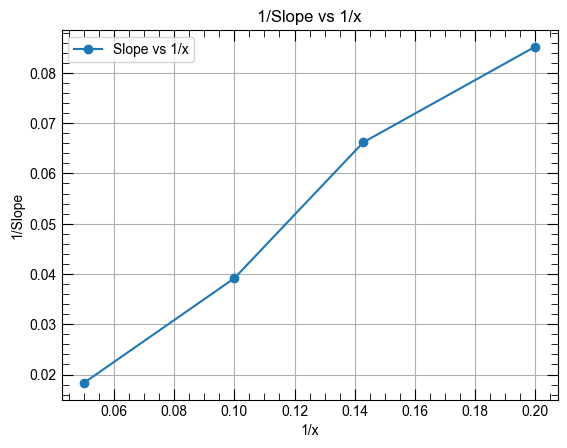

In [4]:
# プロット用のリストを作成
x_inv_list = []
slope_inv_list = []

# 保存したフィッティング係数から slope を抽出
for x in x_values:
    x_inv_list.append(1 / x)  # 1/x の計算
    slope_inv_list.append(1 / fit_coeff_dict[f"x = {x}"]["slope"])  # 傾きをリストに追加

# プロット
plt.figure()
plt.plot(x_inv_list, slope_inv_list, marker="o", linestyle="-", label="Slope vs 1/x")
plt.xlabel("1/x")
plt.ylabel("1/Slope")
plt.title("1/Slope vs 1/x")
plt.grid(True)
plt.legend()
plt.show()

[ 0.45870356 -0.00430012]


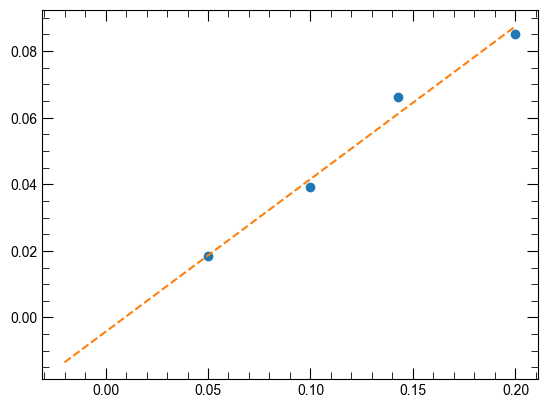

In [5]:
cw_coeff = np.polyfit(x_inv_list, slope_inv_list, 1)  # 傾きと切片を取得
print(cw_coeff)
fig, ax = plt.subplots()
x_inv_min = min(x_inv_list)
x_inv_max = max(x_inv_list)
x_inv_extend = np.linspace(-0.02, x_inv_max, 100)  # y=0 から y_values の最大値まで拡張
fig_line = np.polyval(cw_coeff, x_inv_extend)

ax.plot(x_inv_list, slope_inv_list, marker="o", linestyle="")
ax.plot(x_inv_extend, np.polyval(cw_coeff, x_inv_extend), linestyle="--")
fig.savefig("U3.0-J0.5.pdf")